# Modeling And Machine Learning.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_pickle("../data/train_data_wrangle.plk")
test = pd.read_pickle("../data/test_data_wrangle.plk")

In [3]:
print(train['class'].unique(), ' ', test['class'].unique())

[3 2 1]   [2 3 1]


## Applying machine learning techniques.

In [4]:
X_train = train.drop('class',axis=1)
y_train = train['class']

X_test = test.drop('class',axis=1)
y_test = test['class']

In [5]:
!pip install scikit-plot
!pip install yellowbrick
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\rahul\anaconda3\lib\site-packages (0.3.3)
Requirement not upgraded as not directly required: numpy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (1.13.3)
Requirement not upgraded as not directly required: scipy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: scikit-learn in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

def classifier_scores(clf, phase, x, y, to_print=False, class_print=False, func=accuracy_score):
    """A function used for fitting the classifier, predicting and printing accuracy scores."""
    if phase == 'train':
        clf.fit(x, y)
    if to_print:
        print('Accuracy score of classifier on','train' if phase=='train' else phase,'is',func(clf.predict(x), y))
    
    return clf

def show_report(clf, X, y, type_of='confusion', phase='test'):
    """Function to plot classification report, can also plot confusion matrix."""
    if type_of == 'classification':
        print('Training' if phase=='train' else 'Test','classification report.')
        report_type = ClassificationReport(clf, cmap='Blues')
    else:        
        print('Training' if phase=='train' else 'Test','confusion matrix.')
        report_type = ConfusionMatrix(clf, cmap='Blues')
    if phase == 'train':
        report_type.fit(X, y)
    report_type.score(X, y)
    report_type.poof()

## LogisticRegression will be selected as a base model.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

train_score = classifier_scores(logreg, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.926033934252
Accuracy score of classifier on test is 0.928529754959


### Tuning parameters for logistic regression

In [8]:
classifiers = [] # classifiers
# the grid of parameters to search over
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':Cs}
logreg = LogisticRegression()

gridSearchClf = GridSearchCV(logreg, parameters)
classifier_scores(gridSearchClf, 'train', X_train, y_train)

c = gridSearchClf.best_params_['C']
print('C value:',c)
logreg_C = LogisticRegression(C = c)

train_score = classifier_scores(logreg_C, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg_C, 'test', X_test, y_test, True)

C value: 1000
Accuracy score of classifier on train is 0.952279957582
Accuracy score of classifier on test is 0.946616102684


Training classification report.


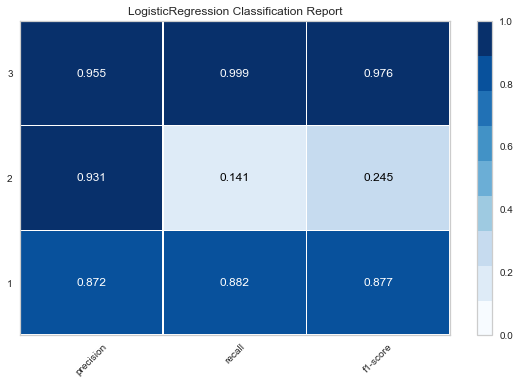

Test classification report.


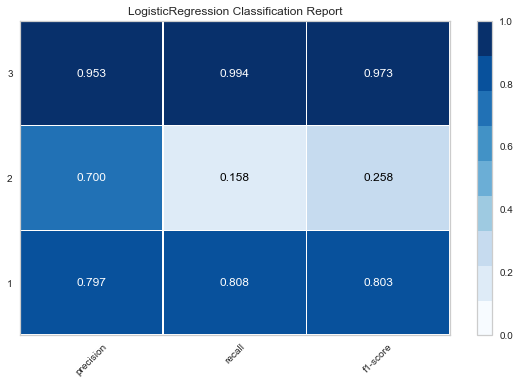

Training confusion matrix.


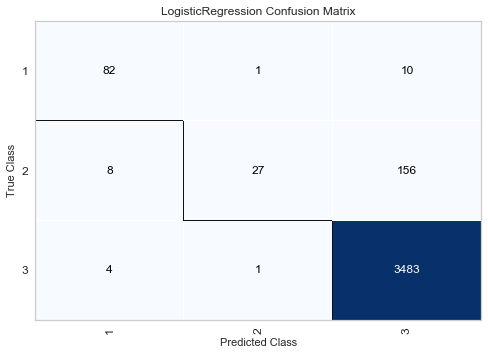

Test confusion matrix.


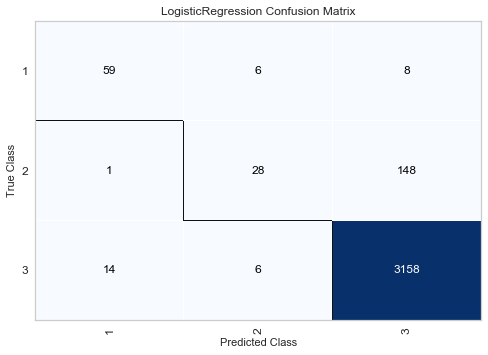

In [10]:
show_report(logreg_C, X_train, y_train, 'classification', 'train')
show_report(logreg_C, X_test, y_test, 'classification', 'test')
show_report(logreg_C, X_train, y_train, 'confusion', 'train')
show_report(logreg_C, X_test, y_test, 'confusion', 'test')
classifiers.append(logreg_C)

C of 1000 did a better prediction than default.

But when it comes to prediction of **class 2**, it did not predict well.

**Perform cross validation.**

In [11]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=42)

logregmodelCV = LogisticRegression(C=c)
logregmodelCV.fit(X_train, y_train)
scorelogregCV = cross_val_score(logregmodelCV, X_train, y_train, cv=kfold)
testscorelogregCV = cross_val_score(logregmodelCV, X_test, y_test, cv=kfold)

print('10-fold cross validation average accuracy on train set is {:.5f}'.format(scorelogregCV.mean()))
print('10-fold cross validation average accuracy on test set is {:.5f}'.format(testscorelogregCV.mean()))

10-fold cross validation average accuracy on train set is 0.95147
10-fold cross validation average accuracy on test set is 0.94195


Training classification report.


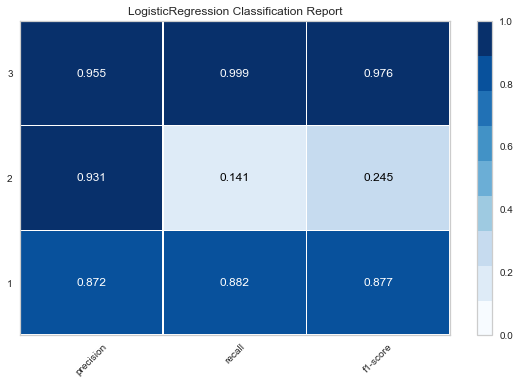

Test classification report.


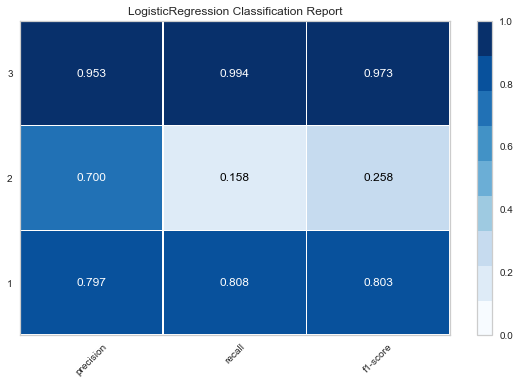

Training confusion matrix.


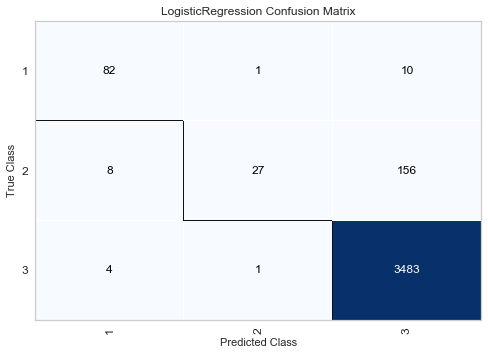

Test confusion matrix.


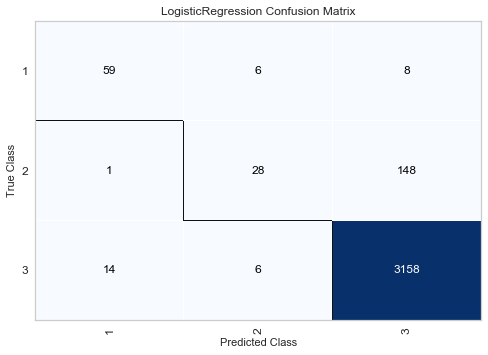

In [12]:
show_report(logregmodelCV, X_train, y_train, 'classification', 'train')
show_report(logregmodelCV, X_test, y_test, 'classification', 'test')
show_report(logregmodelCV, X_train, y_train, 'confusion', 'train')
show_report(logregmodelCV, X_test, y_test, 'confusion', 'test')
classifiers.append(logregmodelCV)

After cross_validation compared with logreg_C accuracy was a bit lower, will stick with logreg_C.

Applying regularizations for logreg_C.

L2 (default) regularization.
Training classification report.


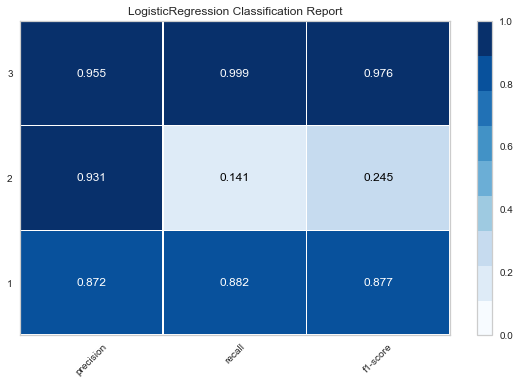

Test classification report.


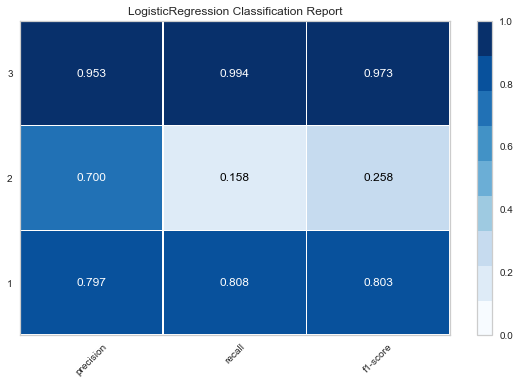

Training confusion matrix.


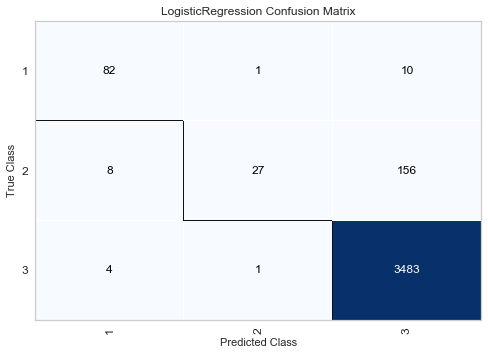

Test confusion matrix.


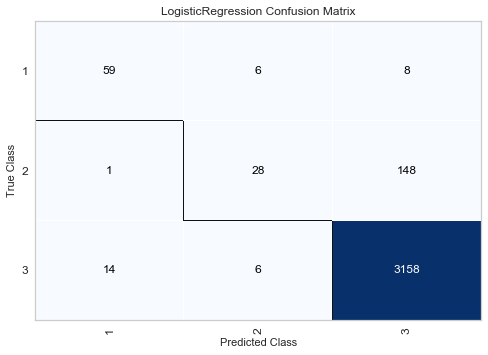

In [13]:
print('L2 (default) regularization.')
show_report(logreg_C, X_train, y_train, 'classification', 'train')
show_report(logreg_C, X_test, y_test, 'classification', 'test')
show_report(logreg_C, X_train, y_train, 'confusion', 'train')
show_report(logreg_C, X_test, y_test, 'confusion', 'test')

In [14]:
logreg_C_l1 = LogisticRegression(penalty='l1', C=c)

train_score = classifier_scores(logreg_C_l1, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg_C_l1, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.957317073171
Accuracy score of classifier on test is 0.949533255543


L1 regularization
Training classification report.


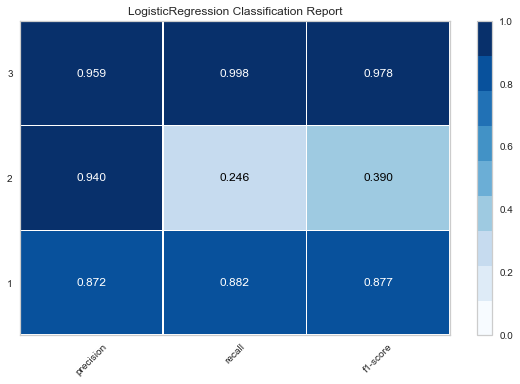

Test classification report.


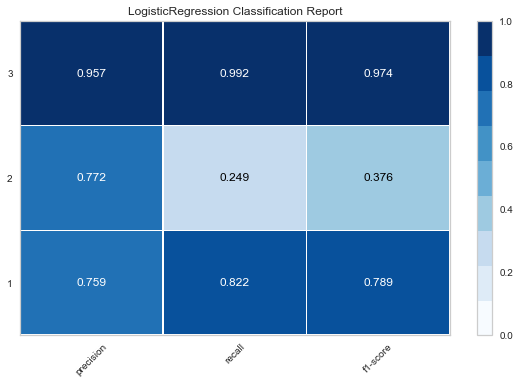

Training confusion matrix.


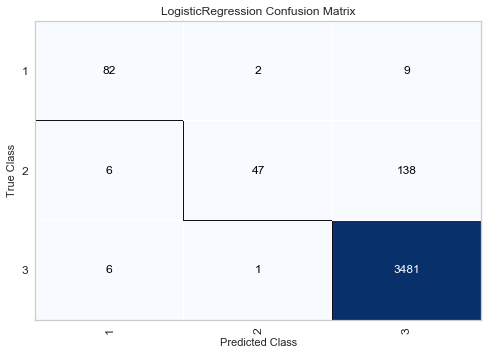

Test confusion matrix.


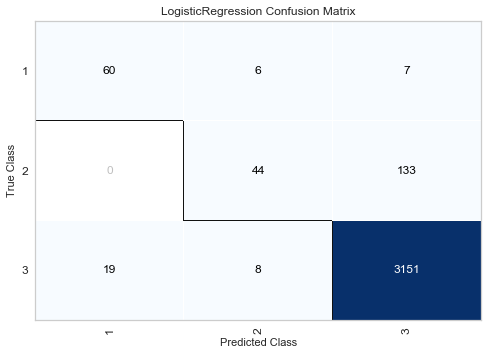

In [15]:
print('L1 regularization')
show_report(logreg_C_l1, X_train, y_train, 'classification', 'train')
show_report(logreg_C_l1, X_test, y_test, 'classification', 'test')
show_report(logreg_C_l1, X_train, y_train, 'confusion', 'train')
show_report(logreg_C_l1, X_test, y_test, 'confusion', 'test')
classifiers.append(logreg_C_l1)

With **L2, L1** regularization(s) the model performed bad in predicting **class 2** in both training and testing phases, by looking at the precision, recall, F1 score.

Logistic regression was not a good model here.

## Base model (LogisticRegression) was not a good classifier in predicting classes.
## Plus from the observation we see that we have an imbalanced data set, so will be applying different techniques to get better classification. 

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

train_score = classifier_scores(rf_clf, 'train', X_train, y_train, True)
test_score = classifier_scores(rf_clf, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.991831971995


Training classification report.


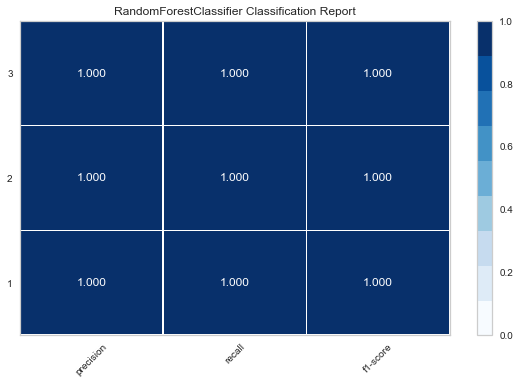

Test classification report.


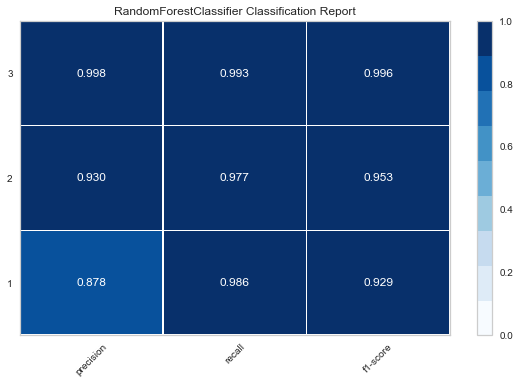

Training confusion matrix.


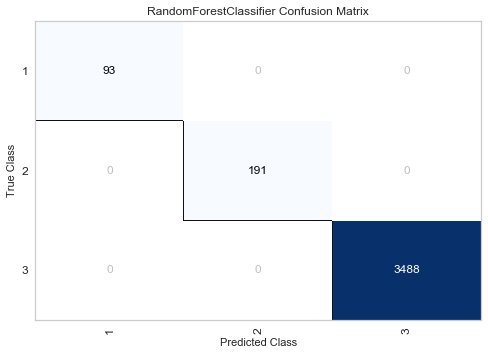

Test confusion matrix.


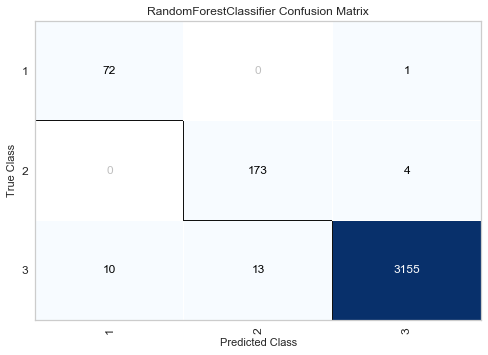

In [17]:
show_report(rf_clf, X_train, y_train, 'classification', 'train')
show_report(rf_clf, X_test, y_test, 'classification', 'test')
show_report(rf_clf, X_train, y_train, 'confusion', 'train')
show_report(rf_clf, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_clf)

In [18]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

rf_oversampler = RandomForestClassifier(random_state=42)

_ = classifier_scores(rf_oversampler, 'train', os_features, os_labels, True)
_ = classifier_scores(rf_oversampler, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.992415402567


Training confusion matrix.


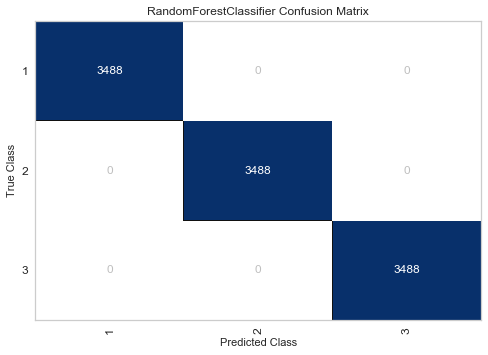

Test confusion matrix.


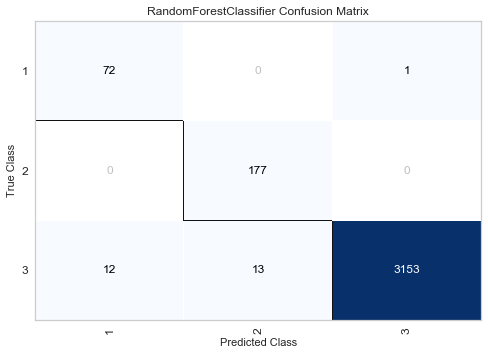

In [19]:
#show_report(rf_oversampler, os_features, os_labels, 'classification', 'train')
#show_report(rf_oversampler, X_test, y_test, 'classification', 'test')
show_report(rf_oversampler, os_features, os_labels, 'confusion', 'train')
show_report(rf_oversampler, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_oversampler)

In [20]:
# before split, how ?

In [21]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler(random_state=42)
us_features, us_labels = under_sampler.fit_sample(X_train,y_train)

rf_under_sampler = RandomForestClassifier(random_state=42)

_ = classifier_scores(rf_under_sampler, 'train', us_features, us_labels, True)
_ = classifier_scores(rf_under_sampler, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.948949824971


Training confusion matrix.


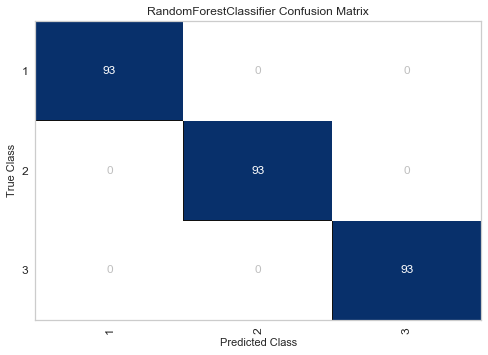

Test confusion matrix.


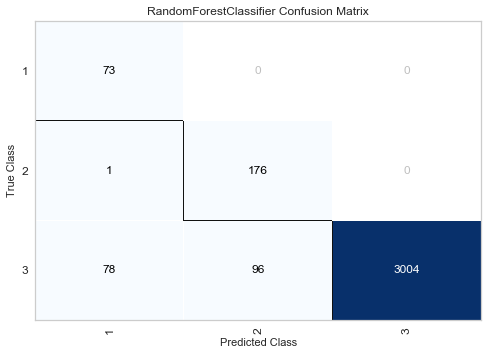

In [22]:
#show_report(rf_under_sampler, us_features, us_labels, 'classification', 'train')
#show_report(rf_under_sampler, X_test, y_test, 'classification', 'test')
show_report(rf_under_sampler, us_features, us_labels, 'confusion', 'train')
show_report(rf_under_sampler, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_under_sampler)

In [23]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
sme_features, sme_labels = sme.fit_sample(X_train,y_train)
rf_smoteenn = RandomForestClassifier(random_state=42)

train_score = classifier_scores(rf_smoteenn, 'train', us_features, us_labels, True)
test_score = classifier_scores(rf_smoteenn, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.948949824971


Training confusion matrix.


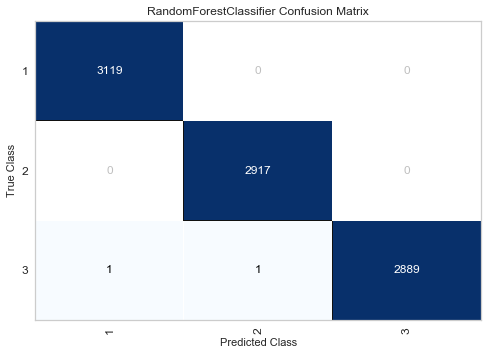

Test confusion matrix.


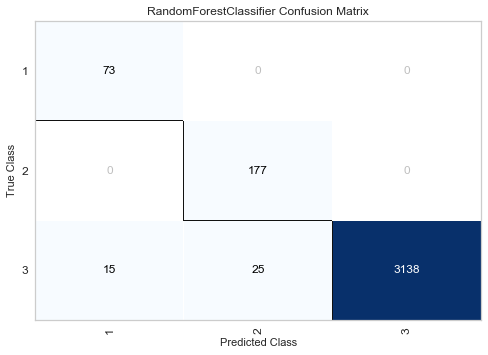

In [24]:
#show_report(rf_smoteenn, sme_features, sme_labels, 'classification', 'train')
#show_report(rf_smoteenn, X_test, y_test, 'classification', 'test')
show_report(rf_smoteenn, sme_features, sme_labels, 'confusion', 'train')
show_report(rf_smoteenn, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_smoteenn)

# Update below.
Performed oversampling on the minority classes and applied RandonForestClassifier on the training set.

After training the prediction for the classes are pretty good.

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=0)

train_score = classifier_scores(dtree_clf, 'train', X_train, y_train)
test_score = classifier_scores(dtree_clf, 'test', X_test, y_test)

Training classification report.


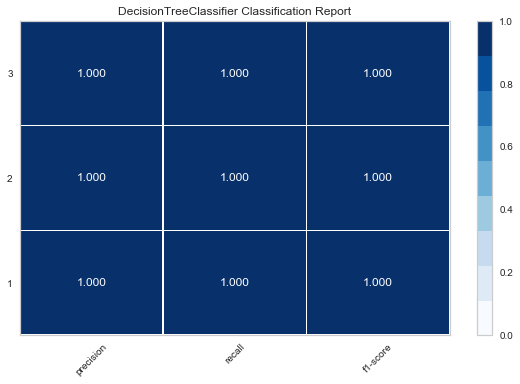

Test classification report.


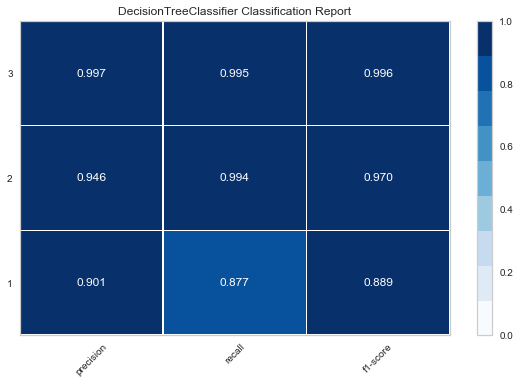

Training confusion matrix.


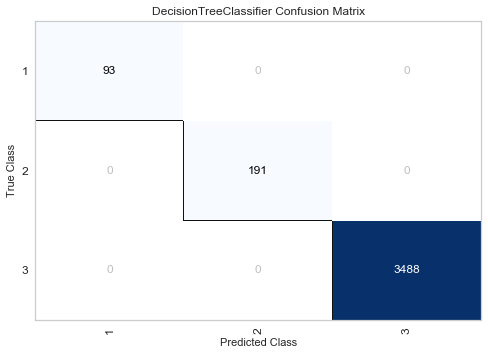

Test confusion matrix.


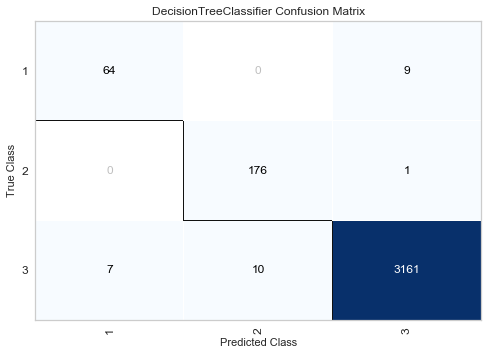

In [26]:
show_report(dtree_clf, X_train, y_train, 'classification', 'train')
show_report(dtree_clf, X_test, y_test, 'classification', 'test')
show_report(dtree_clf, X_train, y_train, 'confusion', 'train')
show_report(dtree_clf, X_test, y_test, 'confusion', 'test')
classifiers.append(dtree_clf)

SMOTE with RandomForestClassifier performed better among classifiers.

## From the datasets (both training and testing) we encountered highly imbalanced datasets, so we did oversampling on the minoirty classes using SMOTE which improved the classification performance for the training phase, used the model on test dataset and it had a good prediction on the classes.

## Plot a ROC curve

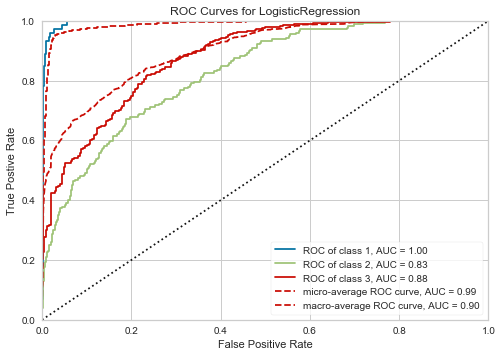

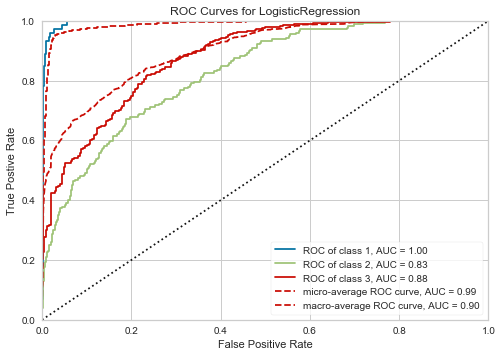

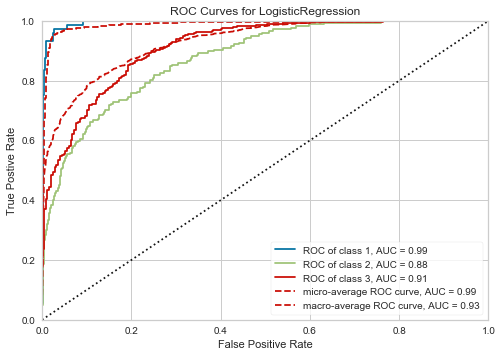

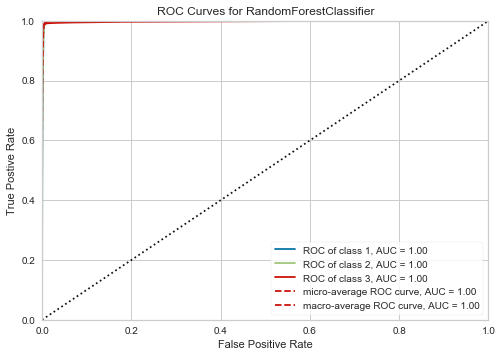

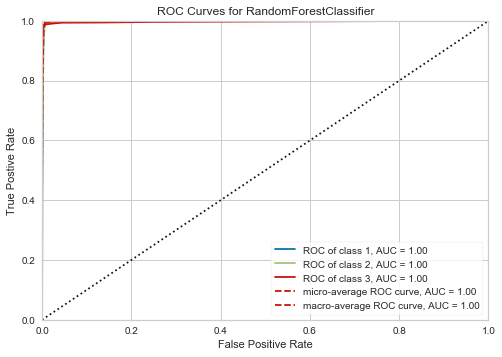

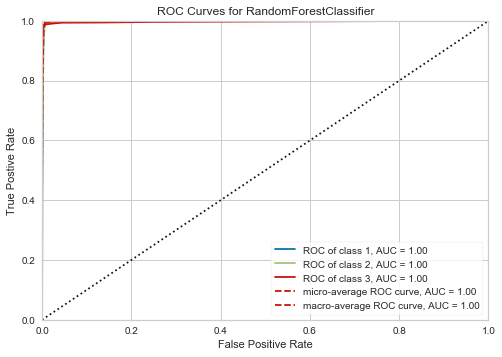

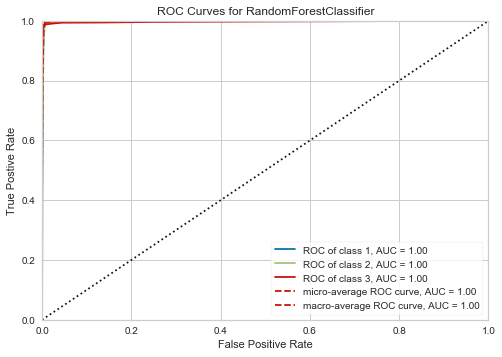

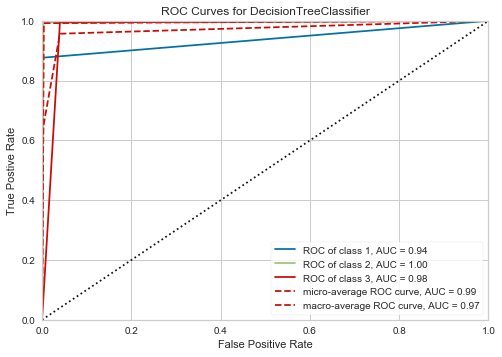

In [27]:
from yellowbrick.classifier import ROCAUC

for classifier in classifiers:
    viz = ROCAUC(classifier)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.poof()